In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

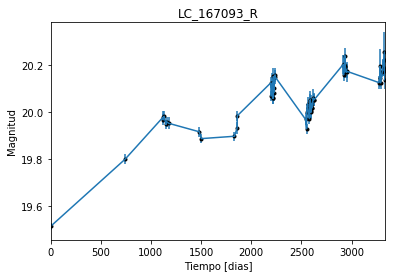

In [2]:
data = np.genfromtxt('LC_167093_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_167093_R')
plt.savefig("LC_167093_R.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

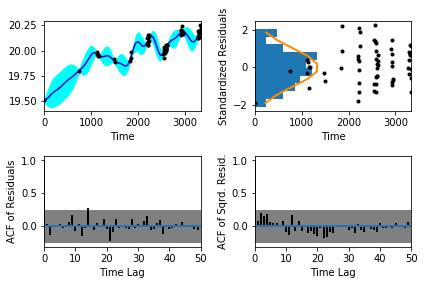

In [5]:
sample.assess_fit()

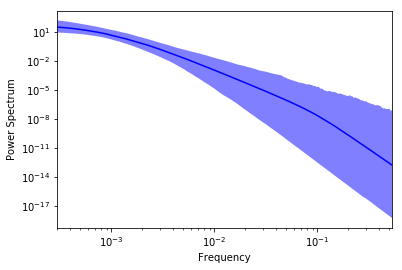

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

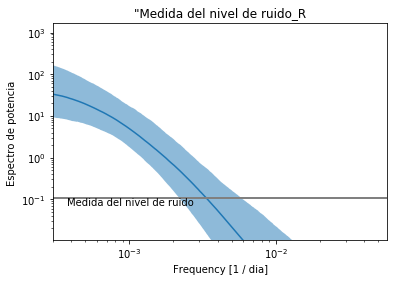

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_167093_R')
plt.title('"Medida del nivel de ruido_R')
plt.savefig("Medida del nivel de ruido_R.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_167093_R')

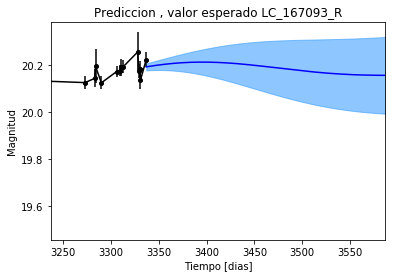

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_167093_R')

Text(0.5,1,'Prediccion, Caminos simulados  LC_167093_R')

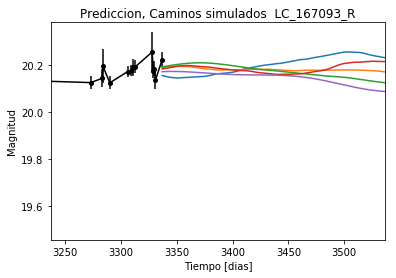

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_167093_R')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


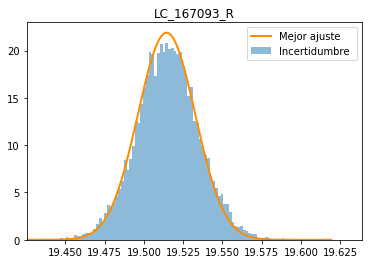

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_167093_R')
plt.savefig("Mejor_ajuste_LC_167093_R.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_167093_R')

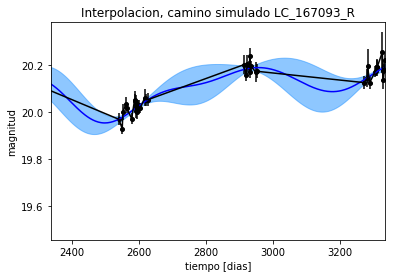

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_167093_R')

Text(0.5,1,'Interpolacion, camino simulado LC_167093_R')

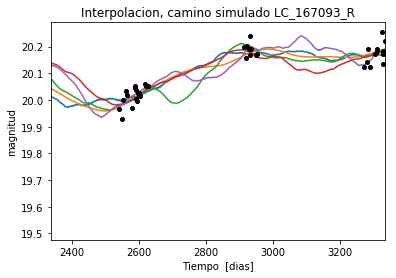

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_167093_R')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 647.473412168
Median: 0.0159004694342
Standard deviation: 0.222458866592
68% credibility interval: [ 0.0009784   0.27117643]
95% credibility interval: [  3.67686245e-04   8.31555024e-01]
99% credibility interval: [  3.12899139e-04   1.02165013e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 638.844436143
Median: 0.000991991725112
Standard deviation: 0.0715155095803
68% credibility interval: [ 0.00039351  0.01188724]
95% credibility interval: [ 0.00031225  0.19442981]
99% credibility interval: [  3.01617818e-04   5.24276133e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 200.210704235
Median: 0.00735772981912
Standar

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1795.65937357
Median: 137.986398031
Standard deviation: 1.57030883685
68% credibility interval: [ 136.2193678   139.15072656]
95% credibility interval: [ 133.75079276  139.79614755]
99% credibility interval: [ 132.09446345  140.06084482]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 407.596615883
Median: 0.555092529927
Standard deviation: 2.14592191081
68% credibility interval: [ 0.03903745  3.83678004]
95% credibility interval: [ 0.01267923  7.26302604]
99% credibility interval: [ 0.00949894  9.25387901]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 463.113607144
Median: 0.276273062426
Standard deviation: 8.36685854437
68% credibility interval: [ 0.01170771  7.13493652]
95% credibility interval: [  8.93650719e-0

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 17187.4482868
Median: 5.15859534253e-25
Standard deviation: 1.24609522305e+23
68% credibility interval: [  2.79441028e-45   4.39301410e-05]
95% credibility interval: [  2.53051293e-113   1.34154321e+001]
99% credibility interval: [  2.39155003e-148   9.85608814e+001]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2439.81590231
Median: 19.9273477774
Standard deviation: 0.134732411465
68% credibility interval: [ 19.81371136  20.04237207]
95% credibility interval: [ 19.65885028  20.20041408]
99% credibility interval: [ 19.49120304  20.37943147]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 239.398554043
Median: 0.0
Standard deviation: 0.239291677997
68% credibility interval: [ 0.         0.2837384]
95% credibility interval: [ 0.          0.88959185]
99% credibility interval: [ 0.          1.02545019]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 239.398554043
Median: 0.0
Standard deviation: 0.239291677997
68% credibility interval: [ 0.         0.2837384]
95% credibility interval: [ 0.          0.88959185]
99% credibility interval: [ 0.          1.02545019]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1302.46888522
Median: 0.0
Standard deviation: 0.000232231840605
68% credibility interval: [ 0.    

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1795.65937357
Median: 137.986398031
Standard deviation: 1.57030883685
68% credibility interval: [ 136.2193678   139.15072656]
95% credibility interval: [ 133.75079276  139.79614755]
99% credibility interval: [ 132.09446345  140.06084482]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2625.29831226
Median: 0.0557116304641
Standard deviation: 0.0617822933913
68% credibility interval: [ 0.03193174  0.11128179]
95% credibility interval: [ 0.02031443  0.23896707]
99% credibility interval: [ 0.01544053  0.3777184 ]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2420.85581653
Median: 0.997682223615
Standard deviation: 0.151641159465
68% credibility interval: [ 0.86060769  1.15730912]
95% credibility interval: [ 0.75652156  1.34303402]
99% credibility interval: [ 0.69103456  1.47925762]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 1745.76445152
Median: 4.40794317511e-05
Standard deviation: 0.0209680052858
68% credibility interval: [  1.45263013e-06   1.25987777e-03]
95% credibility interval: [  8.38390860e-08   9.42459402e-03]
99% credibility interval: [  2.06845990e-08   5.54232522e-02]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 647.473412168
Median: (-0.0999055959265+0j)
Standard deviation: 2.05286630464
68% credibility interval: [-1.70385175+0.j -0.00614748+0.j]
95% credibility interval: [ -5.22481431e+00+0.j          -2.31024081e-03-0.57690572j]
99% credibility interval: [ -6.41921706e+00+0.j          -1.96600328e-03-0.01601978j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 638.844436143
Median: (-0.00623286783207+0j)
Standard deviation: 1.56922443319
68% credibility interval: [-0.07468972+1.23119376j -0.00247247+0.j        ]
95% credibility interval: [-1.22163853 +3.57013769e+00j -0.00196192 +1.40460826e-03j]
99% credibility interval: [ -3.29412410e+00+2.12291181j  -1.89512064e-03+0.j        ]
Posterior summary for parameter ar_roots  e